# Creating a class

# 0. Libraries

In [1]:
import yfinance as yf
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

# 1. Creating a Class


Note that we can use this class again by saving just this class in the cell below as e.g. smabacktest.py. Save this in the same place where the jupyter notebook is.

Note that we have note included functions to test for a biased long or biased short strategy. This can be added too

In [10]:
class SMABacktester():
    def __init__(self, symbol, SMA_S, SMA_L, start, end):
        self.symbol = symbol
        self.SMA_S = SMA_S
        self.SMA_L = SMA_L
        self.start = start
        self.end = end  
        self.results = None
        self.get_data()
        
    def get_data(self):
        df = yf.download(self.symbol, start = self.start, end = self.end)
        data = df['Close'].to_frame()
        data['returns'] = np.log(data['Close'].div(data['Close'].shift(1)))
        data['SMA_S'] = data['Close'].rolling(self.SMA_S).mean()
        data['SMA_L'] = data['Close'].rolling(self.SMA_L).mean()
        data.dropna(inplace = True)
        self.data2 = data
        return data
    
    def test_result(self):
        data = self.data2.copy().dropna()
        data['position'] = np.where(data['SMA_S'] > data['SMA_L'], 1, -1)
        data['strategy'] = data['returns'] * data['position'].shift(1)
        data.dropna(inplace = True)
        data['returns_buy_hold'] = data['returns'].cumsum().apply(np.exp)
        data['return_strategy'] = data['strategy'].cumsum().apply(np.exp)
        perf = data['return_strategy'].iloc[-1]
        outperf = perf - data['returns_buy_hold'].iloc[-1]
        self.results = data
        
        # absolute performance of the strategy (if 1 dollar is invested, what happens)
        ret = np.exp(data['strategy'].sum())
        std = data['strategy'].std() * np.sqrt(252)
    
        #return ret, std
        return round(perf, 6), round(outperf, 6)
    
    def plot_results(self):
        if self.results is None:
            print("Run the test please")
        else:
            title = "{}| SMA_S = {} | SMA_L = {}".format(self.symbol, self.SMA_S, self.SMA_L)
            self.results[['returns_buy_hold', 'return_strategy']].plot(title = title, figsize = (12,8))

In [11]:
tester = SMABacktester("SPY", 50, 100, '2000-01-01', '2020-01-01')

[*********************100%%**********************]  1 of 1 completed


In [12]:
tester.test_result()

(2.592726, 0.297824)

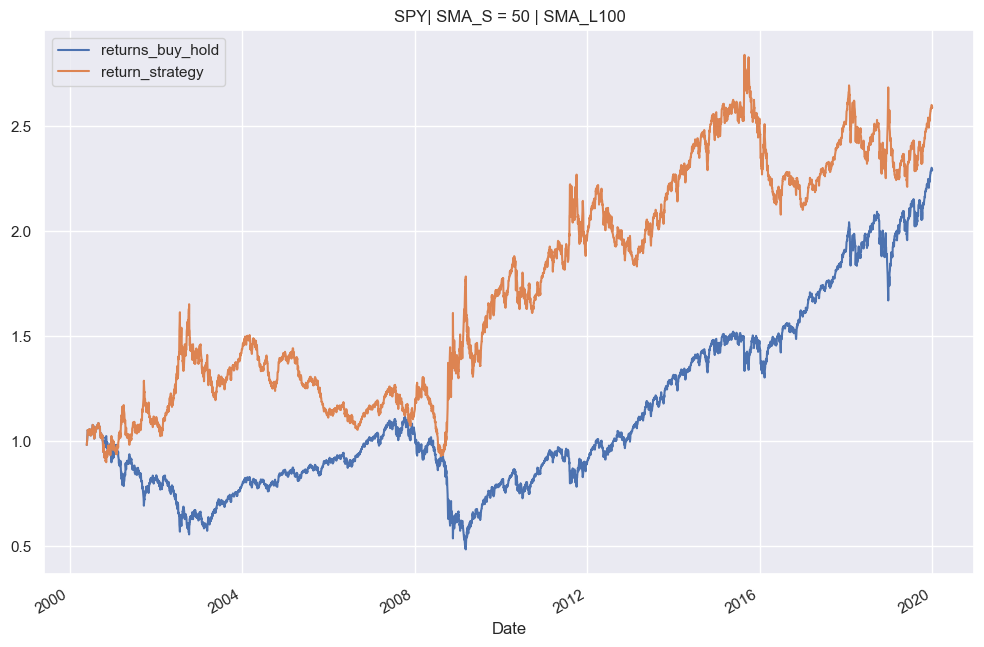

In [13]:
tester.plot_results()

This shows that the strategy is better than the buy and hold strategy